In [1]:
%run algebra.py
%run cache.py
%run costs.py
%run features.py
%run gradients.py
%run helpers.py
%run model.py
%run models.py
%run splits.py

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
SUB_SAMPLE = False
CACHE_DIR = "test/cache/" if SUB_SAMPLE else "cache/"
SUBMISSIONS_DIR = "test/submissions/" if SUB_SAMPLE else "submissions/"

In [3]:
def load_csv_data(data_path, sub_sample=True):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = x[:, 0].astype(np.int)
    input_data = x[:, 2:]

    # convert class labels from strings to binary (-1,1)
    yb = np.ones(len(y))
    yb[np.where(y=='b')] = -1

    # sub-sample
    if sub_sample:
        yb = yb[::50]
        input_data = input_data[::50]
        ids = ids[::50]

    return yb, input_data, ids

In [4]:
y, x, ids = load_csv_data('data/train.csv', SUB_SAMPLE)

### Logistic Regression

In [5]:
class First_Order_Logistic_Regression_Model2(Model):

    def prepare(self, x, y, h):
        
        degree = int(h['degree'])

        x = remove_errors(x)
        x = remove_outliers(x)
        x = standardize_all(x)
        x = remove_nan_features(x)
        x = build_poly(x, degree)
        
        return x, y

    def fit(self, x, y, h={}):
        
        batch_size = int(h['batch_size'])
        n_iters = int(h['n_iters'])
        gamma = float(h['gamma'])
        
        initial_w = np.zeros(x.shape[1])
        return logistic_regression(y, x, initial_w, batch_size, n_iters, gamma)
    
    def test(self, x, y, w, h):
        mse = compute_mse(y, x, w)
        if np.isnan(mse):
            mse = np.inf
        return { 'mse': mse }

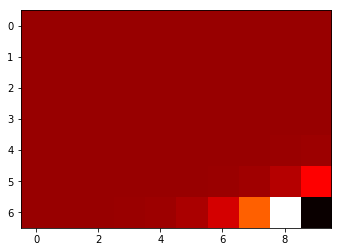

{'batch_size': 1.0,
 'degree': 6.0,
 'gamma': 2.7825594022071258e-11,
 'k_fold': 4.0,
 'n_iters': 500.0,
 'seed': 0.0,
 'mse_te': 0.49816723583794337,
 'mse_tr': 0.4982079429179726}

In [12]:
myModel = CrossValidationModel(First_Order_Logistic_Regression_Model2())

n_iters = [500]
batch_size = [1]
degrees = np.arange(7)
gammas = np.logspace(-15, -10, 10)

hs={
    'n_iters': n_iters,
    'batch_size': batch_size,
    'degree': degrees,
    'gamma': gammas,
    'k_fold': [4],
    'seed': [0]
}

res = myModel.evaluate(x, y, hs, filename=CACHE_DIR+'Logistic_Regression_Explo')

#print(res)

plot_heatmap(res, hs, 'mse_te', 'degree', 'gamma')

#res_mse = np.vectorize(lambda x: x['mse'])(res)
#x_axis = np.unique(np.vectorize(lambda x: x['gamma'])(res))
#y_axis = np.unique(np.vectorize(lambda x: x['degree'])(res))

#plot_heatmap(res, hs, 'mse', 'degree', 'gamma')
find_arg_min(res, 'mse_te')

In [ ]:
hs = {'batch_size': 10.0,
 'degree': 1.0,
 'gamma': 0.0003548133892335753,
 'k_fold': 4.0,
 'n_iters': 100000.0,
 'seed': 0.0,
 'mse_te': 0.3988701335328735,
 'mse_tr': 0.3988200000042866}

myModel.predict(hs, x, y, SUBMISSIONS_DIR + 'Logistic_Regression')

### Second Order Logistic Regression

In [11]:
class Regularized_Logistic_Regression_Model(Model):

    def prepare(self, x, y, h):
        
        degree = int(h['degree'])

        x = remove_errors(x)
        x = remove_outliers(x)
        x = standardize_all(x)
        x = remove_nan_features(x)
        x = build_poly(x, degree)
        
        return x, y

    def fit(self, x, y, h={}):
        
        batch_size = int(h['batch_size'])
        n_iters = int(h['n_iters'])
        gamma = float(h['gamma'])
        lambda_ = float(h['lambda'])
        
        initial_w = np.zeros(x.shape[1])
        return reg_logistic_regression(y, x, initial_w, batch_size, n_iters, gamma, lambda_)
    
    def test(self, x, y, w, h):
        mse = compute_mse(y, x, w)
        if np.isnan(mse):
            mse = np.inf
        return { 'mse': mse }

In [12]:
myModel = CrossValidationModel(Regularized_Logistic_Regression_Model())

n_iters = [1000]
batch_size = [1]
degrees = np.arange(5,15)
gammas = np.logspace(-15, -10, 10)
lambdas = np.logspace(-10, 0, 3)

hs={
    'n_iters': n_iters,
    'batch_size': batch_size,
    'degree': degrees,
    'gamma': gammas,
    'lambda': lambdas,
    'k_fold': [4],
    'seed': [0]
}

res = myModel.evaluate(x, y, hs, filename=CACHE_DIR+'SecondOrd_Logistic_Regression_Explo')

#print(res)

#plot_heatmap(res, hs, 'mse_te', 'degree', 'gamma')

#res_mse = np.vectorize(lambda x: x['mse'])(res)
#x_axis = np.unique(np.vectorize(lambda x: x['gamma'])(res))
#y_axis = np.unique(np.vectorize(lambda x: x['degree'])(res))

#plot_heatmap(res, hs, 'mse', 'degree', 'gamma')
find_arg_min(res, 'mse_te')

KeyboardInterrupt: 

Process ForkPoolWorker-19:
Traceback (most recent call last):
  File "/Users/vincent/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-18:
  File "/Users/vincent/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-17:
Process ForkPoolWorker-20:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/vincent/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/vincent/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/vincent/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/vincent/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._k